# Steps 
1. Importing the libraries
2. Importing the Datasets
3. Data Cleaning ,Data Exploration , Data Manipulation , Data Visualisation
4. EDA - Exploratory Data Analysis 
5. Spliting the Dataset
6. Choosing the model 
7. Traing the model 
8. Testing the model 
9. Model Evaluation 
10. [Optional] Export the dataset into .csv format 

In [2]:
import numpy as np 
import pandas as pd 
import seaborn as sns 
import re 
import matplotlib.pyplot as plt
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score , mean_absolute_error , mean_squared_error

# Importing the Dataset

In [3]:
# pip install kaggle

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.0.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [4]:
# pip install kagglehub


[notice] A new release of pip is available: 25.0.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [5]:
import kagglehub
from kagglehub import KaggleDatasetAdapter

In [6]:
with zipfile.ZipFile('balitmore_salry.csv.zip', 'r') as zip_ref:
    zip_ref.extractall('baltimore_salary_data') 

NameError: name 'zipfile' is not defined

In [7]:
df = pd.read_csv('baltimore_salary_data/train_salary.csv')

In [8]:
df.head()

,Name,JobTitle,AgencyID,Agency,HireDate,AnnualSalary,GrossPay
0,"Aaron,Keontae E",AIDE BLUE CHIP,W02200,Youth Summer,06/10/2013,$11310.00,$873.63
1,"Aaron,Patricia G",Facilities/Office Services II,A03031,OED-Employment Dev,10/24/1979,$53428.00,$52868.38
2,"Aaron,Petra L",ASSISTANT STATE'S ATTORNEY,A29005,States Attorneys Office,09/25/2006,$68300.00,$67439.19
3,"Abaineh,Yohannes T",EPIDEMIOLOGIST,A65026,HLTH-Health Department,07/23/2009,$62000.00,$58654.74
4,"Abbene,Anthony M",POLICE OFFICER TRAINEE,A99416,Police Department,07/24/2013,$43999.00,$39686.95


In [9]:
df.tail()

,Name,JobTitle,AgencyID,Agency,HireDate,AnnualSalary,GrossPay
18976,"Zotamou,Jean Marie D",AIDE BLUE CHIP,W02235,Youth Summer,05/21/2014,$11310.00,NaN
18977,"Zotamou,Pivot D",AIDE BLUE CHIP,W02629,Youth Summer,05/21/2014,$11310.00,NaN
18978,"Zovistoski,Zachary D",POLICE OFFICER TRAINEE,A99416,Police Department,12/17/2013,$43999.00,$21070.03
18979,"Zubyk,Stanislav T",POLICE OFFICER,A99262,Police Department,01/23/2013,$44104.00,$48608.12
18980,"Zukowski,Charles J",Waste Water Tech Supv I Pump,A50206,DPW-Water & Waste Water,10/15/1979,$53568.00,$52164.32


In [10]:
df.shape  #tell no. of rows and no. of column 

(18981, 7)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18981 entries, 0 to 18980
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0    Name         18981 non-null  object
 1   JobTitle      18981 non-null  object
 2   AgencyID      18981 non-null  object
 3   Agency        18981 non-null  object
 4   HireDate      18911 non-null  object
 5   AnnualSalary  18981 non-null  object
 6   GrossPay      15758 non-null  object
dtypes: object(7)
memory usage: 1.0+ MB


In [12]:
df.isnull().sum()

 Name              0
JobTitle           0
AgencyID           0
Agency             0
HireDate          70
AnnualSalary       0
GrossPay        3223
dtype: int64

In [13]:
df.describe()

,Name,JobTitle,AgencyID,Agency,HireDate,AnnualSalary,GrossPay
count,18981,18981,18981,18981,18911,18981,15758
unique,18788,1075,1177,65,4737,1590,13732
top,"Battle,Daron J",AIDE BLUE CHIP,P04001,Youth Summer,05/21/2014,$11310.00,$1051.25
freq,2,4817,316,4323,1478,4811,848


In [14]:
df.columns

Index([' Name', 'JobTitle', 'AgencyID', 'Agency', 'HireDate', 'AnnualSalary',
       'GrossPay'],
      dtype='object')

In [15]:
# Making a copy of the orignal dataframe 
newdf = df.copy()

In [16]:
# Removing the leading and trailing spaces and converting all the columns into the lowercase
newdf.columns = newdf.columns.str.lower().str.strip()

In [17]:
newdf.columns

Index(['name', 'jobtitle', 'agencyid', 'agency', 'hiredate', 'annualsalary',
       'grosspay'],
      dtype='object')

In [18]:
df.columns

Index([' Name', 'JobTitle', 'AgencyID', 'Agency', 'HireDate', 'AnnualSalary',
       'GrossPay'],
      dtype='object')

In [19]:
df.columns=df.columns.str.strip()

In [20]:
df.columns

Index(['Name', 'JobTitle', 'AgencyID', 'Agency', 'HireDate', 'AnnualSalary',
       'GrossPay'],
      dtype='object')

In [21]:
# Checking for num Values
df.isnull().sum()


Name               0
JobTitle           0
AgencyID           0
Agency             0
HireDate          70
AnnualSalary       0
GrossPay        3223
dtype: int64

In [22]:
#  Delete the column Grosspay
newdf.drop('grosspay', axis=1, inplace=True)

In [23]:
newdf.columns

Index(['name', 'jobtitle', 'agencyid', 'agency', 'hiredate', 'annualsalary'], dtype='object')

In [24]:
newdf.agencyid.value_counts()

agencyid
P04001    316
C90786    276
W02629    193
P04002    191
A99416    166
         ... 
W02539      1
A65052      1
W02106      1
W02590      1
W02339      1
Name: count, Length: 1177, dtype: int64

In [25]:
newdf.agencyid.value_counts().map(newdf.agency)

agencyid
P04001    HLTH-Health Department 
C90786             Youth Summer  
W02629         Police Department 
P04002           DPW-Solid Waste 
A99416             Youth Summer  
                   ...           
W02539        OED-Employment Dev 
A65052        OED-Employment Dev 
W02106        OED-Employment Dev 
W02590        OED-Employment Dev 
W02339        OED-Employment Dev 
Name: count, Length: 1177, dtype: object

In [26]:
newdf.jobtitle.value_counts()

jobtitle
AIDE BLUE CHIP                    4817
POLICE OFFICER                    1866
LABORER (Hourly)                   597
EMT Firefighter Suppression        358
CROSSING GUARD                     337
                                  ... 
VEHICLE DAMAGE INVESTIGATOR          1
Community Health Nurse I             1
ACCOUNTING SYSTEMS ANALYST           1
DESK TOP PUBLISHING COORDINATO       1
Research Analyst II                  1
Name: count, Length: 1075, dtype: int64

In [27]:
newdf.annualsalary.value_counts()

annualsalary
$11310.00     4811
$20800.00      325
$29245.00      196
$43999.00      169
$44773.00      163
              ... 
$116300.00       1
$83500.00        1
$40994.00        1
$42846.00        1
$900.00          1
Name: count, Length: 1590, dtype: int64

In [28]:
# Remove the $ from the annual Salary and convert the dtype to integer 
newdf.annualsalary[:]

0        $11310.00
1        $53428.00
2        $68300.00
3        $62000.00
4        $43999.00
           ...    
18976    $11310.00
18977    $11310.00
18978    $43999.00
18979    $44104.00
18980    $53568.00
Name: annualsalary, Length: 18981, dtype: object

In [29]:
# Solution -1 
y=[]
for i in newdf.annualsalary:
    y.append(re.sub(r'^\$',"",i))
newdf.annualsalary = y
newdf.annualsalary=newdf.annualsalary.astype(float)

In [31]:
newdf.head()

,name,jobtitle,agencyid,agency,hiredate,annualsalary
0,"Aaron,Keontae E",AIDE BLUE CHIP,W02200,Youth Summer,06/10/2013,11310.0
1,"Aaron,Patricia G",Facilities/Office Services II,A03031,OED-Employment Dev,10/24/1979,53428.0
2,"Aaron,Petra L",ASSISTANT STATE'S ATTORNEY,A29005,States Attorneys Office,09/25/2006,68300.0
3,"Abaineh,Yohannes T",EPIDEMIOLOGIST,A65026,HLTH-Health Department,07/23/2009,62000.0
4,"Abbene,Anthony M",POLICE OFFICER TRAINEE,A99416,Police Department,07/24/2013,43999.0


In [32]:
# hiredate -> 3 sepratae columns (hiredate , hireday , hireyear (int))

In [179]:
x = newdf.copy()

In [34]:
x.columns

Index(['name', 'jobtitle', 'agencyid', 'agency', 'hiredate', 'annualsalary'], dtype='object')

In [35]:
print(type(x['hiredate']))

<class 'pandas.core.series.Series'>


In [36]:
x['hiredate'] = x['hiredate'].astype(str)

In [37]:
print(x['hiredate'].apply(type).value_counts())

hiredate
<class 'str'>    18981
Name: count, dtype: int64


In [180]:
split_df = x['hiredate'].str.split('/', expand=True)
hire_df = pd.DataFrame({
    'hiremonth': split_df[0],
    'hireday': split_df[1],
    'hireyear': split_df[2]
})

hiredate_idx = x.columns.get_loc('hiredate')
x = x.drop(columns=['hiredate'])

left = x.iloc[:, :hiredate_idx]
right = x.iloc[:, hiredate_idx:]

x = pd.concat([left, hire_df, right], axis=1)



KeyError: 'hiredate'

In [61]:
x.hireyear.dtype

Int64Dtype()

In [62]:
newdf = x

In [63]:
newdf

,name,jobtitle,agencyid,agency,hiremonth,hireday,hireyear,annualsalary
0,"Aaron,Keontae E",AIDE BLUE CHIP,W02200,Youth Summer,6,10,2013,11310.0
1,"Aaron,Patricia G",Facilities/Office Services II,A03031,OED-Employment Dev,10,24,1979,53428.0
2,"Aaron,Petra L",ASSISTANT STATE'S ATTORNEY,A29005,States Attorneys Office,9,25,2006,68300.0
3,"Abaineh,Yohannes T",EPIDEMIOLOGIST,A65026,HLTH-Health Department,7,23,2009,62000.0
4,"Abbene,Anthony M",POLICE OFFICER TRAINEE,A99416,Police Department,7,24,2013,43999.0
...,...,...,...,...,...,...,...,...
18976,"Zotamou,Jean Marie D",AIDE BLUE CHIP,W02235,Youth Summer,5,21,2014,11310.0
18977,"Zotamou,Pivot D",AIDE BLUE CHIP,W02629,Youth Summer,5,21,2014,11310.0
18978,"Zovistoski,Zachary D",POLICE OFFICER TRAINEE,A99416,Police Department,12,17,2013,43999.0
18979,"Zubyk,Stanislav T",POLICE OFFICER,A99262,Police Department,1,23,2013,44104.0


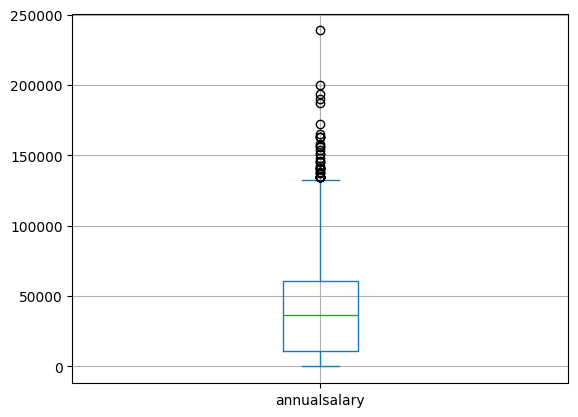

In [66]:
newdf.annualsalary.plot.box()
plt.grid()

In [67]:
newdf.head()

,name,jobtitle,agencyid,agency,hiremonth,hireday,hireyear,annualsalary
0,"Aaron,Keontae E",AIDE BLUE CHIP,W02200,Youth Summer,6,10,2013,11310.0
1,"Aaron,Patricia G",Facilities/Office Services II,A03031,OED-Employment Dev,10,24,1979,53428.0
2,"Aaron,Petra L",ASSISTANT STATE'S ATTORNEY,A29005,States Attorneys Office,9,25,2006,68300.0
3,"Abaineh,Yohannes T",EPIDEMIOLOGIST,A65026,HLTH-Health Department,7,23,2009,62000.0
4,"Abbene,Anthony M",POLICE OFFICER TRAINEE,A99416,Police Department,7,24,2013,43999.0


In [79]:
newdf.jobtitle.value_counts().head(10)

jobtitle
AIDE BLUE CHIP                 4817
POLICE OFFICER                 1866
LABORER (Hourly)                597
EMT Firefighter Suppression     358
CROSSING GUARD                  337
COMMUNITY AIDE                  302
RECREATION ARTS INSTRUCTOR      299
POLICE OFFICER (EID)            250
POLICE SERGEANT                 222
MOTOR VEHICLE DRIVER I          189
Name: count, dtype: int64

In [136]:
x=newdf.groupby('jobtitle')['name'].value_counts().sort_values(ascending=False).head(10)

In [137]:
x

jobtitle                     name                 
POLICE OFFICER               Pawley,Harry A           2
LABORER (Hourly)             Johnson,Eric             2
AIDE BLUE CHIP               Brown,Darius D           2
                             Johnson,Christopher A    2
                             Subba,Aita H             2
                             Williams,Brandon M       2
                             Williams,Imani A         2
CONTRACT SERVICES SPEC. I    Wright,Fred D            2
OPERATIONS TECHN APPRENTICE  Kelley,William P         1
                             Kirikos,Spilios          1
Name: count, dtype: int64

<Axes: xlabel='jobtitle'>

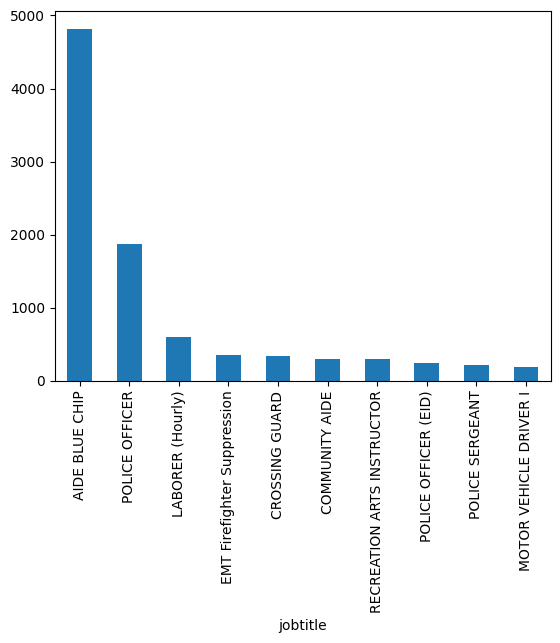

In [124]:
# plot top 10 jobs based on the hireing 

newdf.groupby('jobtitle')['name'].count().sort_values(ascending = False).head(10).plot(kind = 'bar')

In [118]:
# Plot top 10 jobs with the highest Salary 
Top_10=(newdf.groupby(by='jobtitle')['annualsalary'].mean()).sort_values(ascending=False).head(10)

Text(0.5, 1.0, 'Top 10 High Paying Jobs')

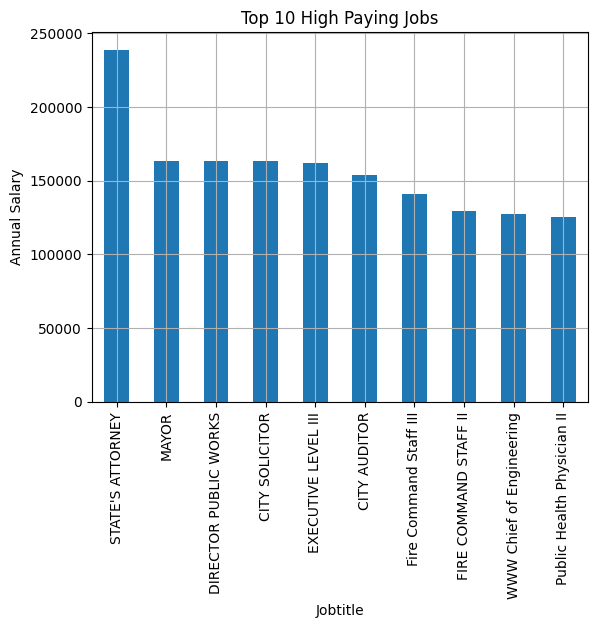

In [119]:
Top_10.plot(kind='bar')
plt.grid()
plt.xlabel('Jobtitle')
plt.ylabel('Annual Salary')
plt.title('Top 10 High Paying Jobs')

<Axes: xlabel='agencyid'>

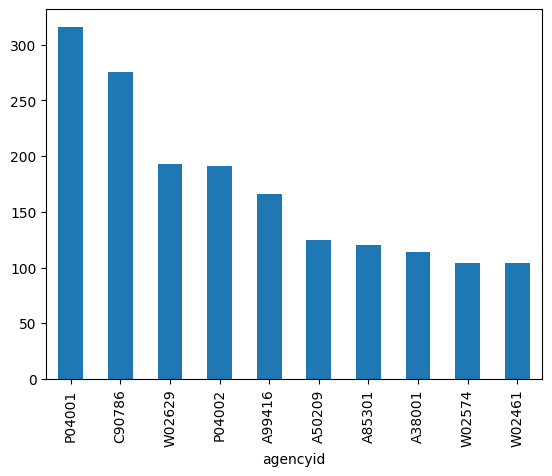

In [161]:
# Plot Top 10 Agency's ID that has highest no. of Employees 
newdf.head()
High_Employees=newdf.groupby('agencyid')['name'].count().sort_values(ascending=False).head(10)
High_Employees.plot(kind = 'bar')

In [150]:
newdf.head()

,name,jobtitle,agencyid,agency,hiremonth,hireday,hireyear,annualsalary
0,"Aaron,Keontae E",AIDE BLUE CHIP,W02200,Youth Summer,6,10,2013,11310.0
1,"Aaron,Patricia G",Facilities/Office Services II,A03031,OED-Employment Dev,10,24,1979,53428.0
2,"Aaron,Petra L",ASSISTANT STATE'S ATTORNEY,A29005,States Attorneys Office,9,25,2006,68300.0
3,"Abaineh,Yohannes T",EPIDEMIOLOGIST,A65026,HLTH-Health Department,7,23,2009,62000.0
4,"Abbene,Anthony M",POLICE OFFICER TRAINEE,A99416,Police Department,7,24,2013,43999.0


<Axes: xlabel='hireyear'>

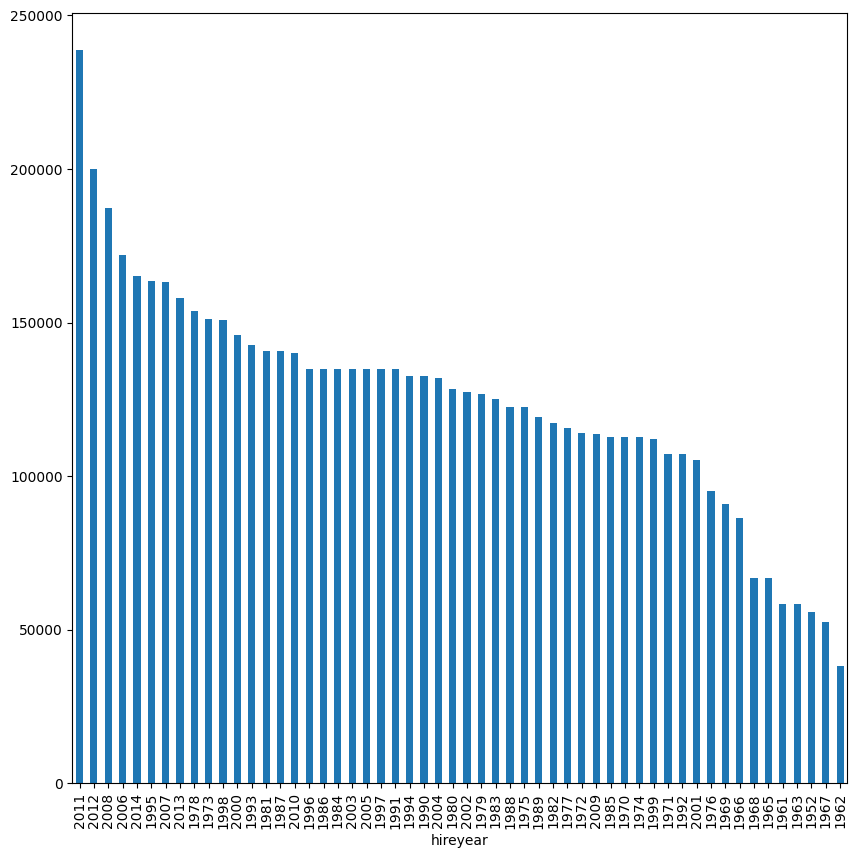

In [163]:
# Plot the Salary vs Year Graph 
# newdf.head()
plt.figure(figsize=(10,10))
newdf.groupby('hireyear')['annualsalary'].max().sort_values(ascending = False).plot(kind = 'bar')

<Axes: xlabel='hireyear'>

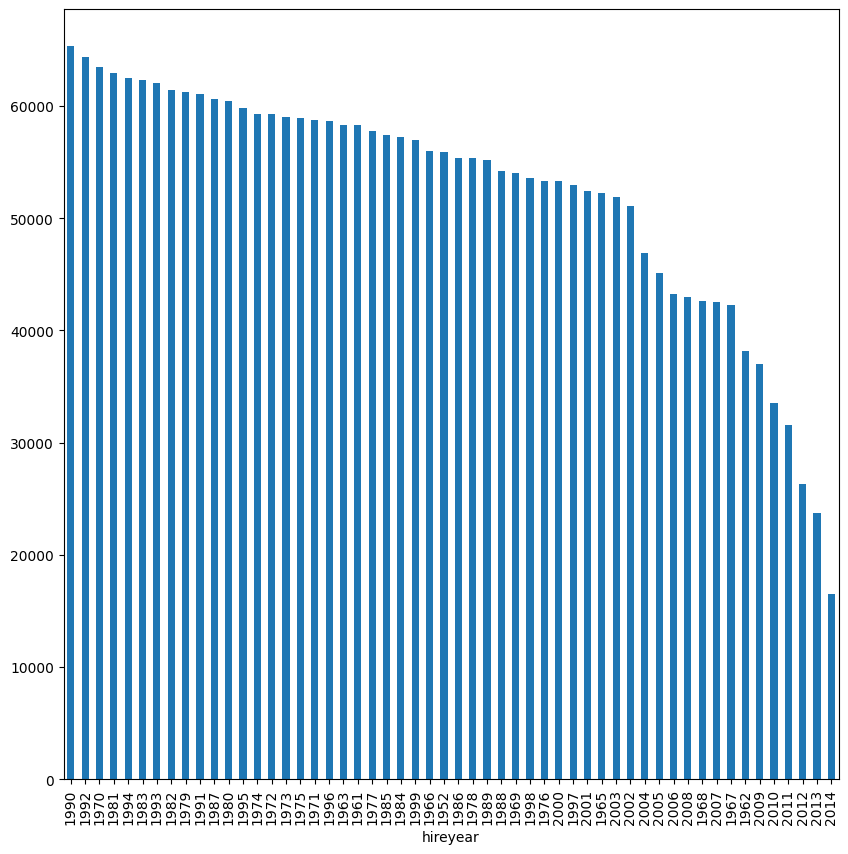

In [166]:
# plot Avg Salary v/s year graph 
plt.figure(figsize=(10,10))
newdf.groupby('hireyear')['annualsalary'].mean().sort_values(ascending = False).plot(kind = 'bar')

<Axes: xlabel='hiremonth'>

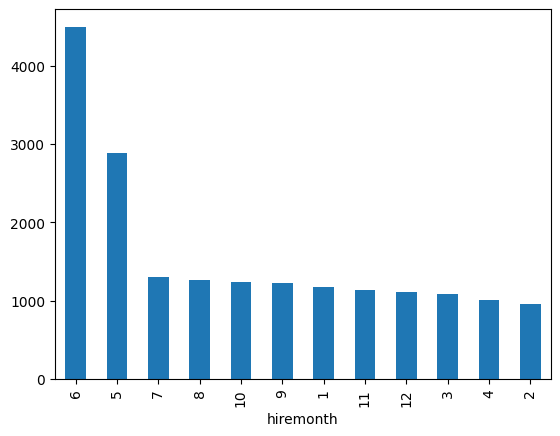

In [169]:
# Plot a Graph to check on which month most of the people hired 
newdf.head()
newdf.groupby('hiremonth')['name'].count().sort_values(ascending=False).plot(kind ='bar')

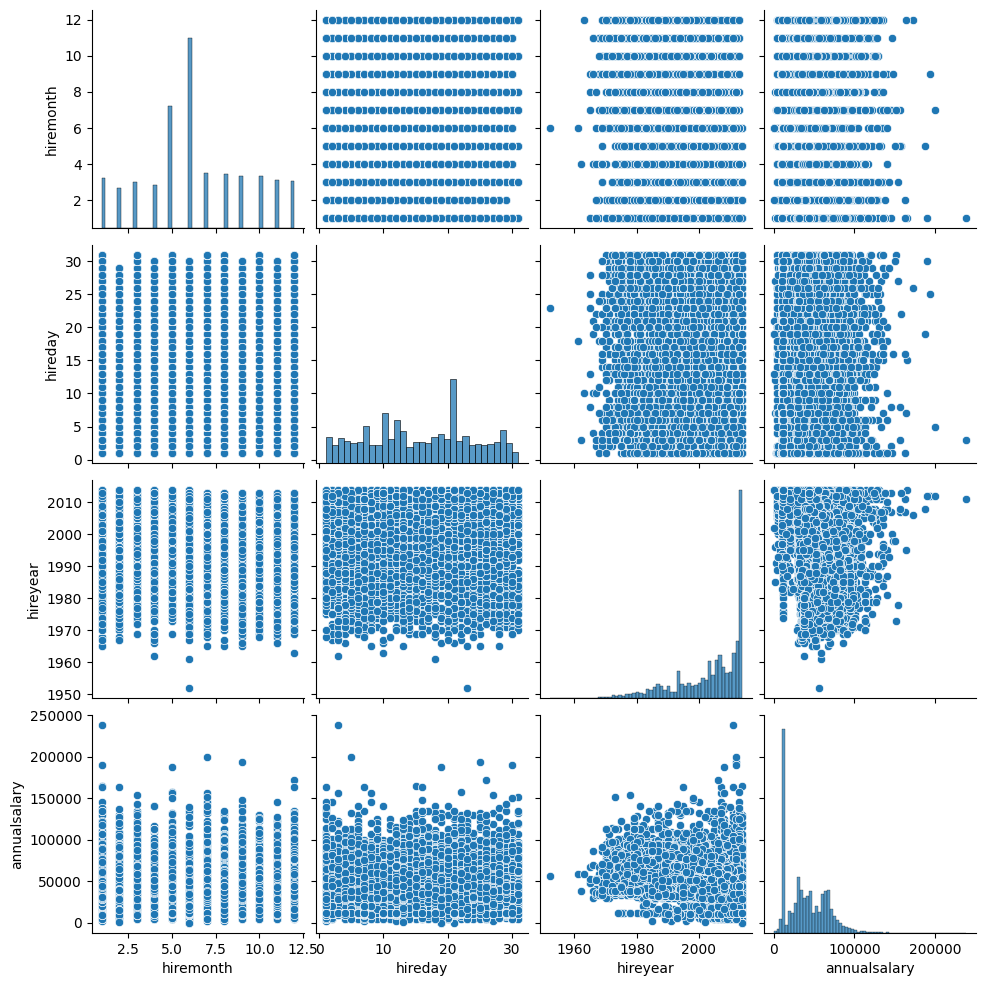

In [174]:
# Plot a Pair Plot 
sns.pairplot(newdf)

<Axes: >

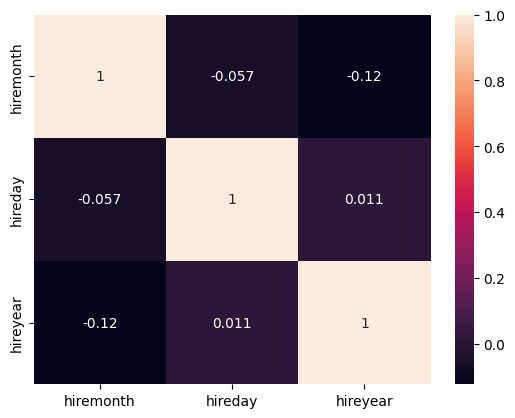

In [182]:
# Plot a heatmap
sns.heatmap(hire_df.corr(),annot=True)

# Machine Learning 

In [458]:
# features and target
X = newdf[['hireday', 'hiremonth', 'hireyear']]
Y = newdf['annualsalary']

In [459]:
X = X.dropna()
Y = Y.loc[X.index]


# Train - Test Split 

In [467]:
# Split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=55)

# Data Preprocessing - Feature Scaling (Standadization)

In [419]:
from sklearn.preprocessing import StandardScaler

In [469]:

# Fit and transform
X_train_scaled = scaler_X.fit_transform(X_train)
X_test_scaled = scaler_X.transform(X_test)
Y_train_scaled = scaler_y.fit_transform(Y_train.values.reshape(-1, 1)).ravel()

# Choose The Model - SVR 

In [422]:
model = SVR(kernel='rbf')

# Train the MOdel 

In [472]:
model.fit(X_train_scaled , Y_train_scaled.ravel())

SVR()

# Test the model

In [477]:
Y_pred = model.predict(X_test_scaled)


In [484]:
Y_pred_actual = scaler_y.inverse_transform(Y_pred.reshape(-1, 1))

In [479]:
Y_pred_actual

array([[12815.29431497],
       [57843.18465626],
       [13824.49877012],
       ...,
       [61695.71622998],
       [13824.07129498],
       [60083.81738353]])

In [486]:
Y_test

12242    11310.0
9546     64163.0
9454     11310.0
4775     97725.0
4776     53568.0
          ...   
14105    33215.0
16876    64163.0
17396    66539.0
16837    11310.0
6119     52171.0
Name: annualsalary, Length: 3783, dtype: float64

# Performance Metrices

In [463]:
print("R² Score:", model.score(X_test_scaled, scaler_y.transform(Y_test.values.reshape(-1, 1))))

R² Score: 0.43400105265565825


In [431]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score

In [432]:
mean_absolute_error(Y_pred_actual ,Y_test )

12960.77671030331

In [433]:
mean_squared_error(Y_pred_actual ,Y_test)

359508148.7425009

In [434]:
r2_score(Y_pred_actual ,Y_test)

0.007160082607343687

# Conclusion

# If an Employee Joins on the following date : 02/09/2018 ,04,04/2015,21/12/2021 ->Predict the salaries

In [473]:
new_data = np.array([[21, 12, 2009]])  # day, month, year
new_data_scaled = scaler_X.transform(new_data)
pred_scaled = model.predict(new_data_scaled).reshape(-1, 1)
pred_salary = scaler_y.inverse_transform(pred_scaled)

print("Predicted Salary:", pred_salary)


Predicted Salary: [[45978.64030352]]


C:\Users\Charanjot Kaur\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [474]:
new_data = np.array([[21, 12, 2015]])  # day, month, year
new_data_scaled = scaler_X.transform(new_data)
pred_scaled = model.predict(new_data_scaled).reshape(-1, 1)
pred_salary = scaler_y.inverse_transform(pred_scaled)

print("Predicted Salary:", pred_salary)

Predicted Salary: [[22570.25435971]]


C:\Users\Charanjot Kaur\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [476]:
new_data = np.array([[21, 12, 2021]])  # day, month, year
new_data_scaled = scaler_X.transform(new_data)
pred_scaled = model.predict(new_data_scaled).reshape(-1, 1)
pred_salary = scaler_y.inverse_transform(pred_scaled)

print("Predicted Salary:", pred_salary)

Predicted Salary: [[-1276.85252446]]


C:\Users\Charanjot Kaur\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
